In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

In [7]:
data = pd.read_csv("monthly_csv.csv")
data.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [8]:
data.Date = pd.to_datetime(data['Date'])
data.set_index("Date", inplace=True)
data = data["Mean"]

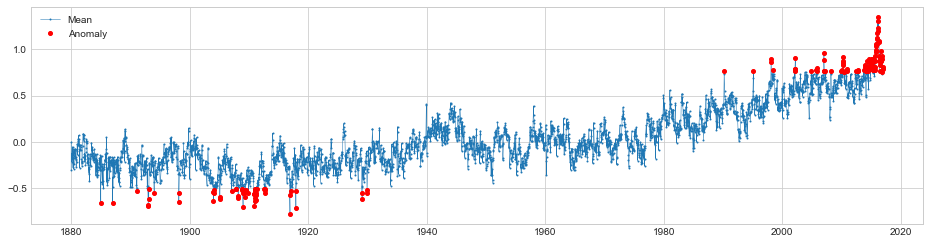

In [9]:
thresholdDetector = ThresholdAD(low = -0.5, high=0.75)
anomalies = thresholdDetector.detect(data)
plot(data, anomaly = anomalies, anomaly_color= "red", anomaly_tag = "marker")
plt.show()

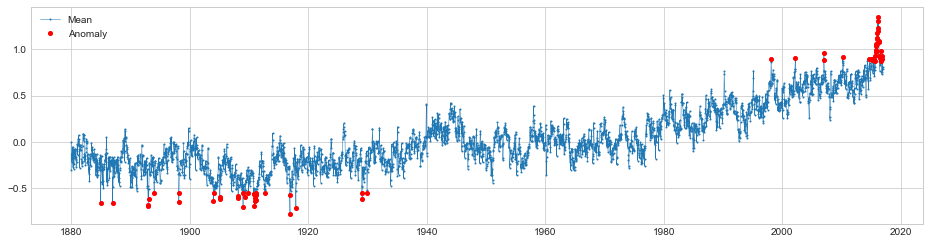

In [10]:
quantile_detector = QuantileAD(low = 0.01, high=0.99)
anomalies = quantile_detector.fit_detect(data)
plot(data, anomaly = anomalies, anomaly_color= "red", anomaly_tag = "marker")
plt.show()

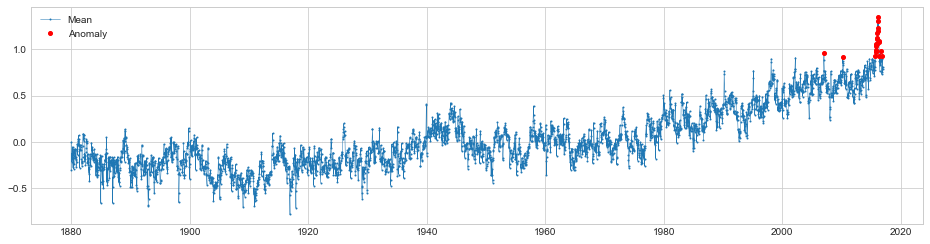

In [11]:
iqr_detector = InterQuartileRangeAD(c=1.5)
anomalies = iqr_detector.fit_detect(data)
plot(data, anomaly = anomalies, anomaly_color= "red", anomaly_tag = "marker")
plt.show()